In [37]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

## Распределения.

Многие классические распределения представлены в scipy.stats при помощи классов.  
Например stats.uniform -- класс соответствующий равномерному распределению.

Документация по распределениям в scipy.stats просто ужасна. Функция help(...) просто неюзабельна (лучше ее не спрашивать, а сразу гуглить). Потому я и сделал эту шпаргалку.

### Инициализация распределений

stats.uniform(-1, 2) -- объект соответствующий равномерному распределению на отрезке $[-1, 1]$.  
Обычно распределения для инициализации принимают 2 параметра loc и scale, которые для разных распределений имеют свой смысл.  
Но в общих чертах loc задает насколько "сдвинуто" распределение, а scale -- насколько растянуто.  
Например для равномерного распределение на отрезке $[a, b]$ loc равен $a$, а scale равен $b - a$.  
А для нормального loc и scale задают матожидание и стандартное отклонение.


In [67]:
distr = stats.uniform(-1, 2)

### Что умеют распределения
Во первых из них можно сэмплировать

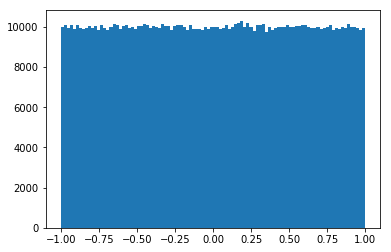

In [77]:
sample_size = 10 ** 6
# Возьмем выборку независимых сэмплов размера sample_size. В качестве размера может быть tuple
sample = distr.rvs(sample_size)

plt.hist(sample, bins=100)
plt.show()

А еще распределения знают про себя кучу полезной информации:
* distr.pdf(x) -- значения функции плотности в точках массива x. (для непрерывных распределений)
* distr.pmf(x) -- вероятности точек массива x. (для дискретных распределений)
* distr.cdf(x) -- значения функции распределения в точках массива x.
* distr.ppf(alpha) -- alpha-тая квантиль. (т. е. вероятность того, что distr.rvs() < distr.ppf(0.05) равна 0.05).
* distr.mean() (а также median, var, std) -- среднее, медиана, дисперсия, стандартное отклонение.


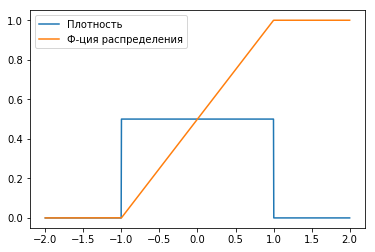

In [71]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, distr.pdf(x), label="Плотность")
plt.plot(x, distr.cdf(x), label="Ф-ция распределения")
plt.legend()
plt.show()

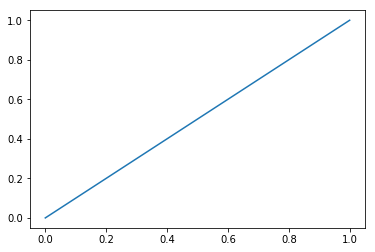

In [78]:
# Проверим что distr.ppf и distr.cdf обратны дуг другу:
probs = np.linspace(0, 1, 1001)
probs2 = distr.cdf(distr.ppf(probs))
assert np.allclose(probs, probs2)
plt.plot(probs, probs2)
plt.show()

In [82]:
print(np.sum(sample < distr.ppf(0.1)) / sample_size)

0.099983


## Статистические тесты

Для стат. тестов документация значительно лучше, поэтому буду краток.  
Обычно тесты возврашают как результат пару (значение статистики, pvalue).  
Еще у них часто есть опция alternative со следующими возможными значениями:
* "two-sided" -- 
* "less" -- 
* "greater" -- 


In [119]:
n_tosses = 1000
n_heads = stats.binom(n_tosses, 0.4).rvs()
(stats.binom_test(
    n_heads, n_tosses,
    alternative="less"
),
stats.binom_test(
    n_heads, n_tosses,
#     alternative="less"
))

(1.2671889390246798e-05, 2.5343778780493596e-05)

In [122]:
stats.ttest_ind(stats.norm().rvs(1000), stats.norm(1).rvs(1000), alternative="less"
)

TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

In [105]:
stats.binom(n_tosses, 0.4).rvs()

41

In [124]:
help(stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sco

In [ ]:
!